Okay we were able to clean it up for the most part but some further cleaning is needed to get the dataset ready for modeling.

### Loading Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from sklearn.preprocessing import StandardScaler

### Loading Datasets

In [2]:
df = pd.read_csv("updated_cleaned_dataset_2.csv")

In [4]:
list(df.columns.values)

['SEQN',
 'FastingGlucose',
 'FastingInsulin',
 'BUN',
 'SerumCreatinine',
 'LBXSATSI',
 'EverSmoked100',
 'EverDrank',
 'DrinkFrequency',
 'AvgDrinksPerDay',
 'Age',
 'Gender',
 'Education',
 'IncomeToPovertyRatio',
 'HasDiabetes',
 'DIQ050',
 'DIQ070',
 'ACR',
 'likely_type1',
 'T2D',
 'IncomeMissing',
 'HOMA_B',
 'CurrentSmoker_2.0',
 'CurrentSmoker_3.0',
 'CurrentSmoker_Missing',
 'CurrentSmoker_Not at all',
 'SurveyCycle_2001-2002',
 'SurveyCycle_2003-2004',
 'SurveyCycle_2005-2006',
 'SurveyCycle_2007-2008',
 'SurveyCycle_2009-2010',
 'SurveyCycle_2011-2012',
 'SurveyCycle_2013-2014',
 'SurveyCycle_2015-2016',
 'SurveyCycle_2017-2020',
 'EverDrank_Label_Drinks Alcohol',
 'eGFR']

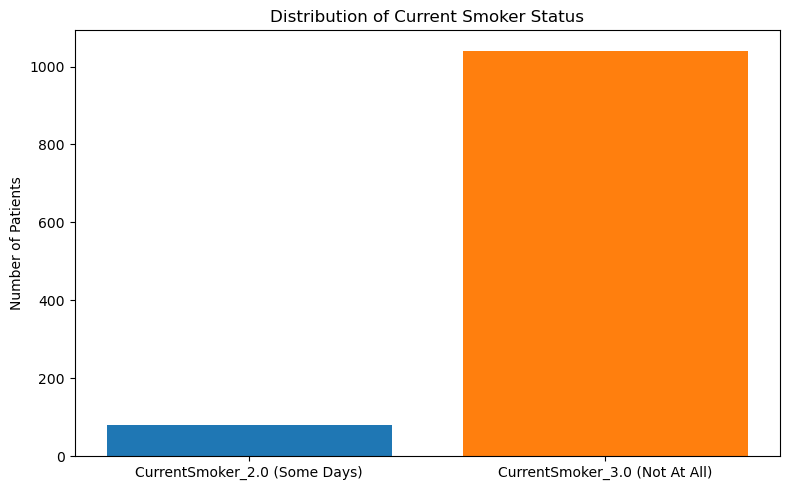

In [5]:
smoker_counts = {
    "CurrentSmoker_2.0 (Some Days)": df['CurrentSmoker_2.0'].sum(),
    "CurrentSmoker_3.0 (Not At All)": df['CurrentSmoker_3.0'].sum()
}

# Plot the bar graph
plt.figure(figsize=(8, 5))
plt.bar(smoker_counts.keys(), smoker_counts.values(), color=['#1f77b4', '#ff7f0e'])
plt.ylabel("Number of Patients")
plt.title("Distribution of Current Smoker Status")
plt.tight_layout()
plt.show()

In [6]:
def reconstruct_smoking_status(row):
    if row['CurrentSmoker_2.0'] == 1:
        return 'Some Days'
    elif row['CurrentSmoker_3.0'] == 1:
        return 'Not At All'
    else:
        return 'Every Day'

df['SmokingStatus'] = df.apply(reconstruct_smoking_status, axis=1)

In [7]:
df['Smoker'] = df['SmokingStatus'].apply(lambda x: 1 if x in ['Every Day', 'Some Days'] else 0)

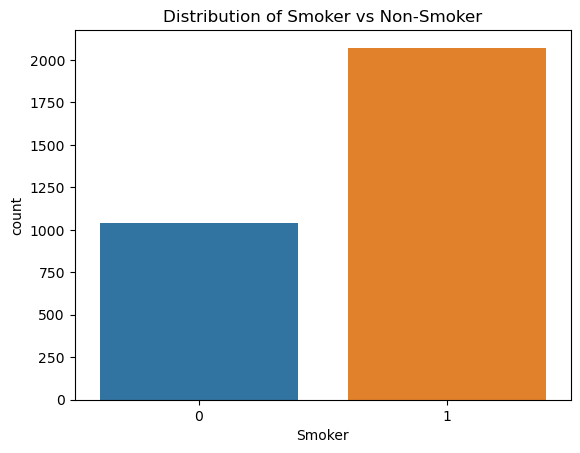

In [8]:
sns.countplot(data=df, x='Smoker')
plt.title("Distribution of Smoker vs Non-Smoker")
plt.show()

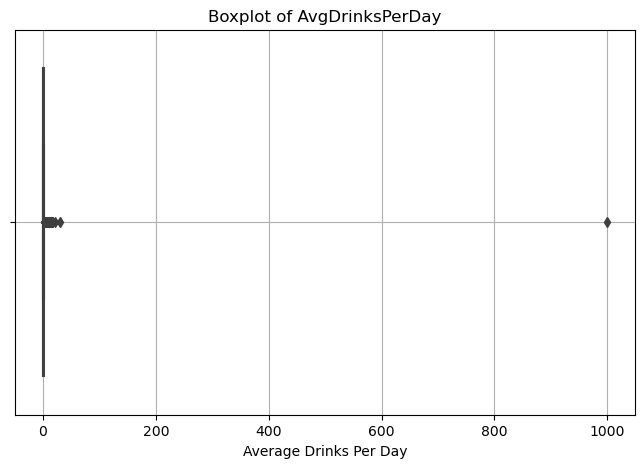

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['AvgDrinksPerDay'])

plt.title('Boxplot of AvgDrinksPerDay')
plt.xlabel('Average Drinks Per Day')
plt.grid(True)
plt.show()

### Understanding Dataset

In [10]:
df.shape

(3113, 39)

In [11]:
list(df.columns.values)

['SEQN',
 'FastingGlucose',
 'FastingInsulin',
 'BUN',
 'SerumCreatinine',
 'LBXSATSI',
 'EverSmoked100',
 'EverDrank',
 'DrinkFrequency',
 'AvgDrinksPerDay',
 'Age',
 'Gender',
 'Education',
 'IncomeToPovertyRatio',
 'HasDiabetes',
 'DIQ050',
 'DIQ070',
 'ACR',
 'likely_type1',
 'T2D',
 'IncomeMissing',
 'HOMA_B',
 'CurrentSmoker_2.0',
 'CurrentSmoker_3.0',
 'CurrentSmoker_Missing',
 'CurrentSmoker_Not at all',
 'SurveyCycle_2001-2002',
 'SurveyCycle_2003-2004',
 'SurveyCycle_2005-2006',
 'SurveyCycle_2007-2008',
 'SurveyCycle_2009-2010',
 'SurveyCycle_2011-2012',
 'SurveyCycle_2013-2014',
 'SurveyCycle_2015-2016',
 'SurveyCycle_2017-2020',
 'EverDrank_Label_Drinks Alcohol',
 'eGFR',
 'SmokingStatus',
 'Smoker']

In [64]:
columns_to_drop = [
    'CurrentSmoker_Missing',
    'EverDrank',  # redundant
    'DIQ050',     # insulin use (already accounted for in T2D filters)
    'DIQ070',     # diabetes pill use
    'FastingGlucose',    # HOMA-B multicolinearity
    'FastingInsulin',    # HOMA-B multicolinearity
    'SEQN',       #  no longer needed
    'likely_type1',
    'HasDiabetes' # t2d column already there
]

# Drop columns
df = df.drop(columns=columns_to_drop)

In [65]:
df.shape

(3113, 28)

In [66]:
list(df.columns.values)

['BUN',
 'SerumCreatinine',
 'LBXSATSI',
 'EverSmoked100',
 'DrinkFrequency',
 'AvgDrinksPerDay',
 'Age',
 'Gender',
 'Education',
 'IncomeToPovertyRatio',
 'ACR',
 'T2D',
 'IncomeMissing',
 'HOMA_B',
 'CurrentSmoker_2.0',
 'CurrentSmoker_3.0',
 'CurrentSmoker_Not at all',
 'SurveyCycle_2001-2002',
 'SurveyCycle_2003-2004',
 'SurveyCycle_2005-2006',
 'SurveyCycle_2007-2008',
 'SurveyCycle_2009-2010',
 'SurveyCycle_2011-2012',
 'SurveyCycle_2013-2014',
 'SurveyCycle_2015-2016',
 'SurveyCycle_2017-2020',
 'EverDrank_Label_Drinks Alcohol',
 'eGFR']

#### Heatmap Of All Features

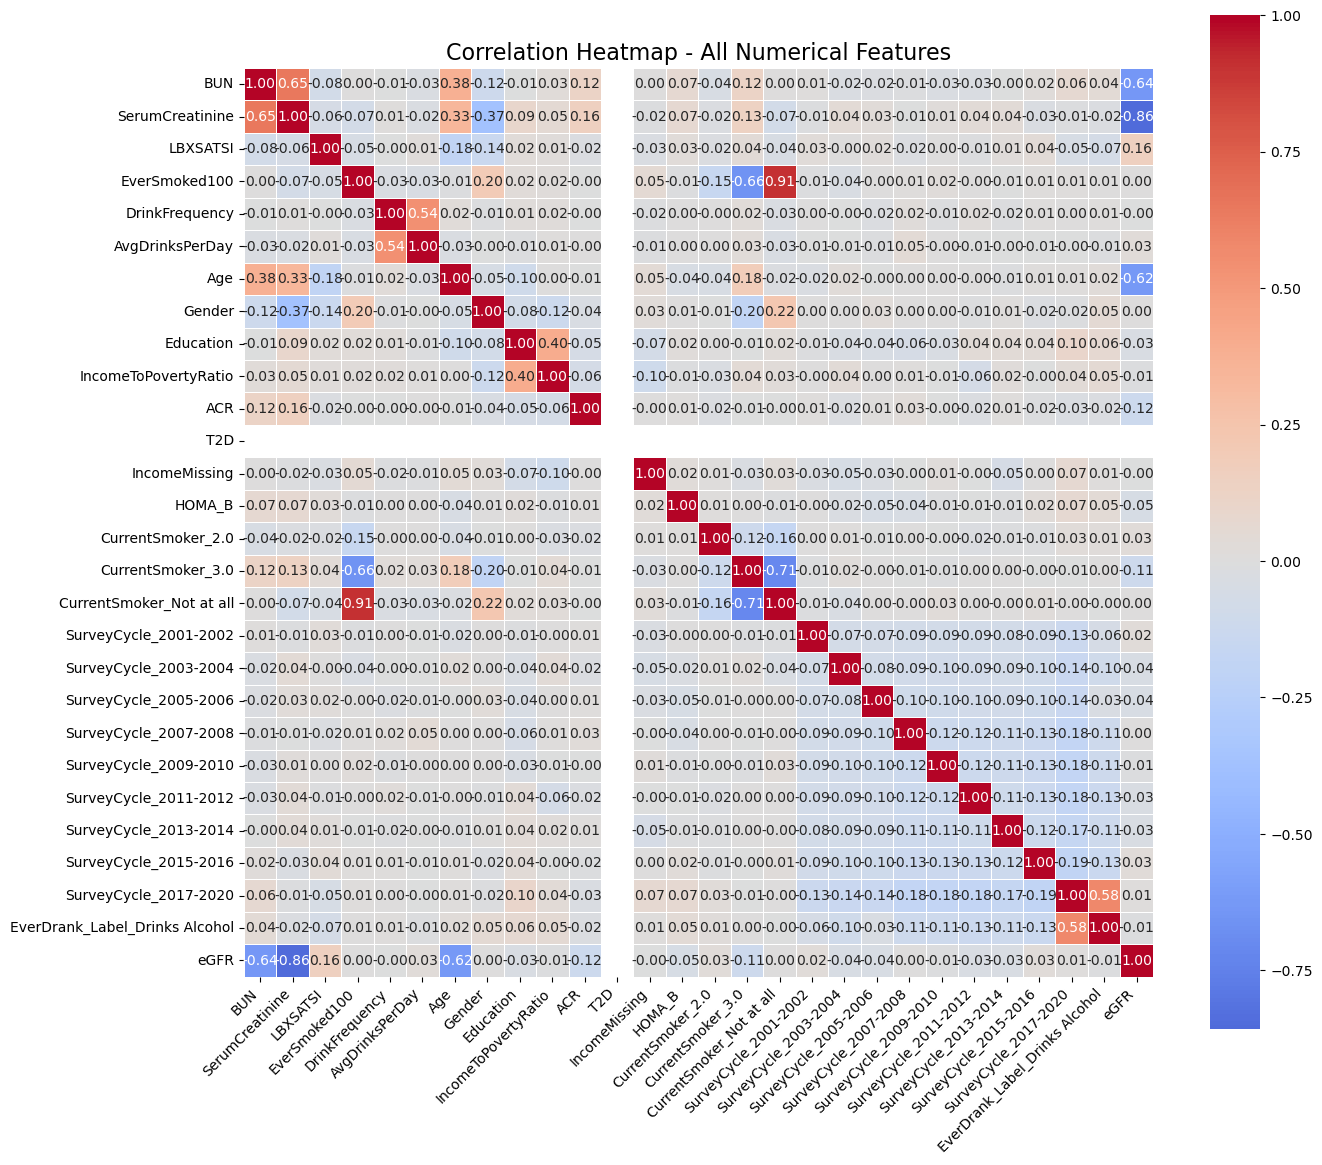

In [67]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr_matrix = numerical_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True, linewidths=0.5)

# Add title
plt.title("Correlation Heatmap - All Numerical Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

#### Heatmap of Potential Modeling Features

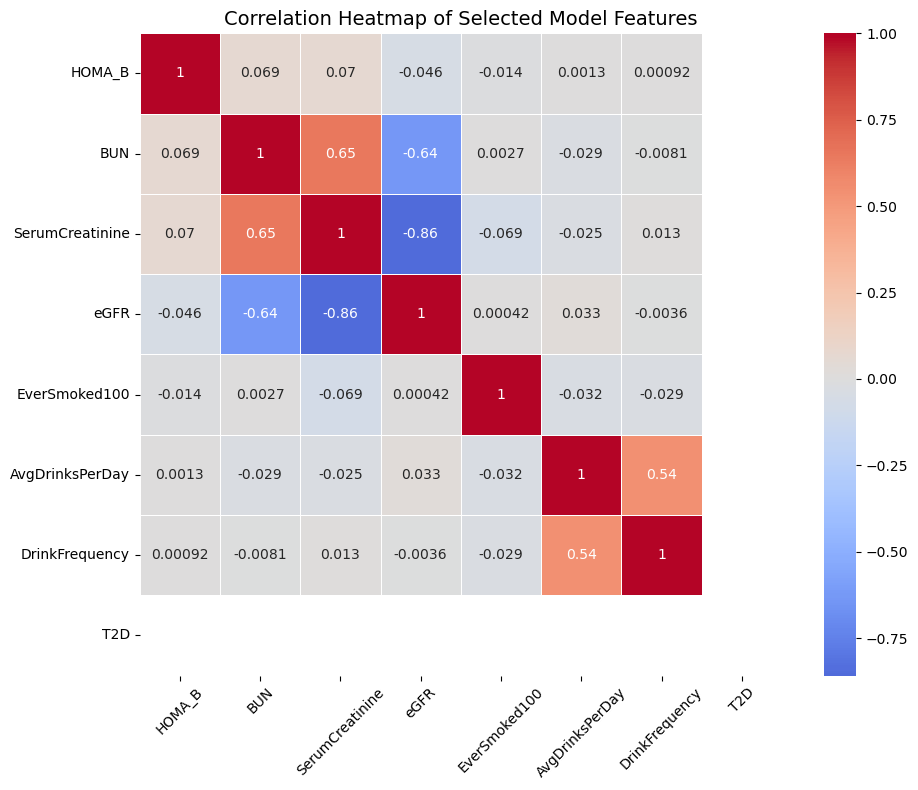

In [68]:
features_to_plot = [
    'HOMA_B',
    'BUN',
    'SerumCreatinine',
    'eGFR',
    'EverSmoked100',
    'AvgDrinksPerDay',
    'DrinkFrequency',
    'T2D'
]

corr_matrix = df[features_to_plot].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Selected Model Features", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### If we are focusing on frequency rather than whether or not the patient smoked or drank ever

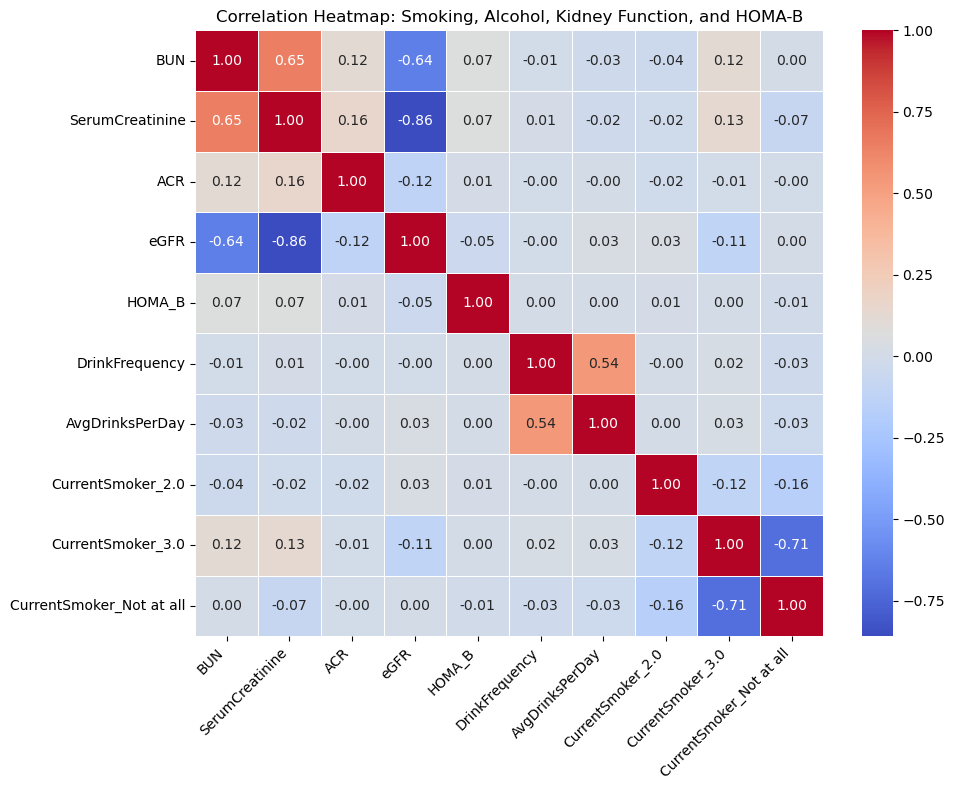

In [69]:
selected_features = [
    'BUN', 'SerumCreatinine', 'ACR', 'eGFR',       # Kidney function
    'HOMA_B',                                       # β-cell function
    'DrinkFrequency', 'AvgDrinksPerDay',           # Alcohol behavior
    'CurrentSmoker_2.0', 'CurrentSmoker_3.0',       # Smoking frequency (some days, not at all)
    'CurrentSmoker_Not at all',                    # Extra smoking category if needed    
]

subset_df = df[selected_features]
corr_matrix = subset_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Smoking, Alcohol, Kidney Function, and HOMA-B")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [70]:
columns_to_drop_2 = [
    'SerumCreatinine',
    'CurrentSmoker_Not at all',
    'DrinkFrequency'
]

# Drop columns
df = df.drop(columns=columns_to_drop_2)

In [71]:
df.shape

(3113, 25)

In [72]:
list(df.columns.values)

['BUN',
 'LBXSATSI',
 'EverSmoked100',
 'AvgDrinksPerDay',
 'Age',
 'Gender',
 'Education',
 'IncomeToPovertyRatio',
 'ACR',
 'T2D',
 'IncomeMissing',
 'HOMA_B',
 'CurrentSmoker_2.0',
 'CurrentSmoker_3.0',
 'SurveyCycle_2001-2002',
 'SurveyCycle_2003-2004',
 'SurveyCycle_2005-2006',
 'SurveyCycle_2007-2008',
 'SurveyCycle_2009-2010',
 'SurveyCycle_2011-2012',
 'SurveyCycle_2013-2014',
 'SurveyCycle_2015-2016',
 'SurveyCycle_2017-2020',
 'EverDrank_Label_Drinks Alcohol',
 'eGFR']

In [88]:
plot = [
    'HOMA_B',
    'BUN',
    'eGFR',
    'EverSmoked100',
    'AvgDrinksPerDay',
    'ACR',
    'AvgDrinksPerDay',
    'CurrentSmoker_2.0', 
    'CurrentSmoker_3.0',
]

corr_matrix = df[plot].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Selected Model Features", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KeyError: "['HOMA_B', 'BUN', 'eGFR', 'ACR'] not in index"

I'm a little worried about the multicollinearity between eGFR and BUN (-0.64), so I'm gonna check the VIF.

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[['eGFR', 'BUN']]
X = add_constant(X)
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

  Variable        VIF
0    const  55.873320
1     eGFR   1.692297
2      BUN   1.692297


Okay, great! So keeping both of these features won't pose a problem in the model.

In [75]:
df.describe()

,BUN,LBXSATSI,EverSmoked100,AvgDrinksPerDay,Age,Gender,Education,IncomeToPovertyRatio,ACR,T2D,...,SurveyCycle_2003-2004,SurveyCycle_2005-2006,SurveyCycle_2007-2008,SurveyCycle_2009-2010,SurveyCycle_2011-2012,SurveyCycle_2013-2014,SurveyCycle_2015-2016,SurveyCycle_2017-2020,EverDrank_Label_Drinks Alcohol,eGFR
count,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.0,...,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000
mean,16.127530,25.003855,1.505300,1.431417,62.350145,1.487633,3.005782,2.214494,170.157019,1.0,...,0.069386,0.072599,0.106650,0.108256,0.104722,0.093800,0.121105,0.210087,0.320270,85.408319
std,6.625988,16.596779,0.543767,18.003245,12.726790,0.499927,1.373629,1.434493,780.208803,0.0,...,0.254151,0.259518,0.308717,0.310753,0.306244,0.291597,0.326302,0.407435,0.466655,22.355734
min,2.000000,3.000000,1.000000,0.000000,18.000000,1.000000,1.000000,0.000000,0.256410,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.236204
25%,12.000000,16.000000,1.000000,0.000000,54.000000,1.000000,2.000000,1.100000,7.300000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.245444
50%,15.000000,21.000000,1.000000,0.000000,63.000000,1.000000,3.000000,1.800000,14.657534,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,89.048235
75%,19.000000,28.000000,2.000000,1.000000,72.000000,2.000000,4.000000,3.060000,47.919075,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,102.266927
max,59.000000,280.000000,9.000000,999.000000,85.000000,2.000000,9.000000,5.000000,16636.363636,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,150.251460


In [76]:
min_max_df = df.agg(['min', 'max']).T
min_max_df.columns = ['Min', 'Max']
print(min_max_df)

                                      Min           Max
BUN                              2.000000     59.000000
LBXSATSI                         3.000000    280.000000
EverSmoked100                    1.000000      9.000000
AvgDrinksPerDay                  0.000000    999.000000
Age                             18.000000     85.000000
Gender                           1.000000      2.000000
Education                        1.000000      9.000000
IncomeToPovertyRatio             0.000000      5.000000
ACR                              0.256410  16636.363636
T2D                              1.000000      1.000000
IncomeMissing                    0.000000      1.000000
HOMA_B                           0.042781    104.016064
CurrentSmoker_2.0                0.000000      1.000000
CurrentSmoker_3.0                0.000000      1.000000
SurveyCycle_2001-2002            0.000000      1.000000
SurveyCycle_2003-2004            0.000000      1.000000
SurveyCycle_2005-2006            0.000000      1

In [77]:
df = df.drop(columns=['LBXSATSI'], errors='ignore')

In [78]:
df.shape

(3113, 24)

### Clean Up Time TTTTTTTT

#### Capping Extreme Values

In [79]:
### How is there even someone who drank 999 times in one day???
df['AvgDrinksPerDay'] = df['AvgDrinksPerDay'].clip(upper=20)

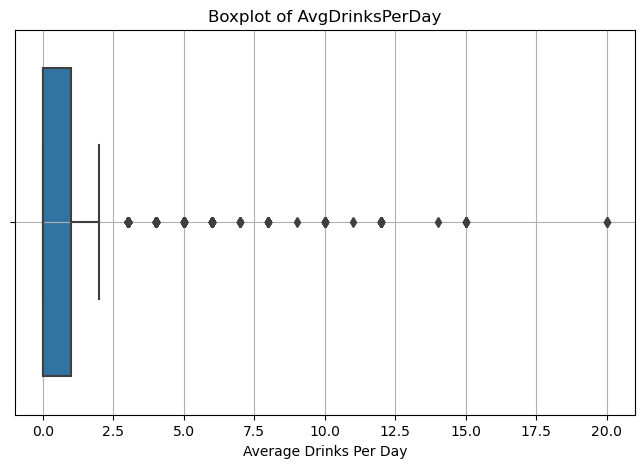

In [80]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['AvgDrinksPerDay'])

plt.title('Boxplot of AvgDrinksPerDay')
plt.xlabel('Average Drinks Per Day')
plt.grid(True)
plt.show()

#### Log Transform ACR

In [81]:
df['ACR_log'] = np.log1p(df['ACR'])
df = df.drop(columns=['ACR'])

#### Scaling the Rest

In [82]:
scaler = StandardScaler()

features_to_scale = ['BUN', 'Age', 'HOMA_B', 'eGFR']
df_scaled = pd.DataFrame(scaler.fit_transform(df[features_to_scale]), 
                         columns=[f"{col}_scaled" for col in features_to_scale])

df = pd.concat([df, df_scaled], axis=1)

In [83]:
min_max_df = df.agg(['min', 'max']).T
min_max_df.columns = ['Min', 'Max']
print(min_max_df)

                                      Min         Max
BUN                              2.000000   59.000000
EverSmoked100                    1.000000    9.000000
AvgDrinksPerDay                  0.000000   20.000000
Age                             18.000000   85.000000
Gender                           1.000000    2.000000
Education                        1.000000    9.000000
IncomeToPovertyRatio             0.000000    5.000000
T2D                              1.000000    1.000000
IncomeMissing                    0.000000    1.000000
HOMA_B                           0.042781  104.016064
CurrentSmoker_2.0                0.000000    1.000000
CurrentSmoker_3.0                0.000000    1.000000
SurveyCycle_2001-2002            0.000000    1.000000
SurveyCycle_2003-2004            0.000000    1.000000
SurveyCycle_2005-2006            0.000000    1.000000
SurveyCycle_2007-2008            0.000000    1.000000
SurveyCycle_2009-2010            0.000000    1.000000
SurveyCycle_2011-2012       

In [84]:
columns_to_drop_3 = [
    'eGFR',
    'Age',
    'BUN',
    'HOMA_B'
]

# Drop columns
df = df.drop(columns=columns_to_drop_3)

In [85]:
df.shape

(3113, 24)